In [1024]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [1025]:
import torch
import torch.nn as nn

In [1026]:
df1 = pd.read_csv("./MSFT.csv")
df2 = pd.read_csv("./FB.csv")

In [1027]:
data = df1['Close'].values

In [1028]:
T = 20
X = []
Y = []

for t in range(len(data)- 2 * T):
    x = data[t:t+T]
    X.append(x)
    y = data[t+T: t+T*2]
    Y.append(y)

In [1029]:
class ANN(nn.Module):
    def __init__(self, input_no, output_no, hidden_layers):
        super().__init__()
        layers = []
        
        no_in = input_no
        for h in hidden_layers:
            layers.append(nn.Linear(no_in, h))
            layers.append(nn.ReLU(inplace=True))
            
            no_in = h
            
        layers.append(nn.Linear(hidden_layers[-1], output_no))
        self.layer = nn.Sequential(*layers)
    def forward(self,X):
        out = self.layer(X)
        return out

In [1030]:
model = ANN(T, T, [100,100])

In [1031]:
model

ANN(
  (layer): Sequential(
    (0): Linear(in_features=20, out_features=100, bias=True)
    (1): ReLU(inplace=True)
    (2): Linear(in_features=100, out_features=100, bias=True)
    (3): ReLU(inplace=True)
    (4): Linear(in_features=100, out_features=20, bias=True)
  )
)

In [1032]:
train_count = int(len(X) * 0.005)
X_train = torch.tensor(X[:-1], dtype=torch.float)
y_train =torch.tensor(Y[:-1], dtype=torch.float)
X_test = torch.tensor(X[-1:], dtype=torch.float)
y_test = torch.tensor(Y[-1:], dtype=torch.float)

In [1033]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [1034]:
epochs = 90
losses = []
test_losses = []
for epoch in range(epochs):
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    test_loss = criterion(model(X_test),y_test)
    test_losses.append(test_loss)
    print(f'Epoch [{epoch+1}/{epochs}]. Loss : {loss.item()}. Test Loss : {test_loss.item()}')

Epoch [1/90]. Loss : 12452.6728515625. Test Loss : 44695.06640625
Epoch [2/90]. Loss : 11911.494140625. Test Loss : 42669.3125
Epoch [3/90]. Loss : 11371.728515625. Test Loss : 40596.6796875
Epoch [4/90]. Loss : 10823.521484375. Test Loss : 38459.24609375
Epoch [5/90]. Loss : 10257.3466796875. Test Loss : 36234.421875
Epoch [6/90]. Loss : 9667.1708984375. Test Loss : 33920.3671875
Epoch [7/90]. Loss : 9052.630859375. Test Loss : 31554.275390625
Epoch [8/90]. Loss : 8424.345703125. Test Loss : 29067.31640625
Epoch [9/90]. Loss : 7763.14794921875. Test Loss : 26448.552734375
Epoch [10/90]. Loss : 7066.96142578125. Test Loss : 23713.23046875
Epoch [11/90]. Loss : 6339.51611328125. Test Loss : 20883.81640625
Epoch [12/90]. Loss : 5587.8193359375. Test Loss : 18008.87109375
Epoch [13/90]. Loss : 4822.1923828125. Test Loss : 15125.3828125
Epoch [14/90]. Loss : 4054.332763671875. Test Loss : 12292.2568359375
Epoch [15/90]. Loss : 3300.1025390625. Test Loss : 9588.248046875
Epoch [16/90]. Loss

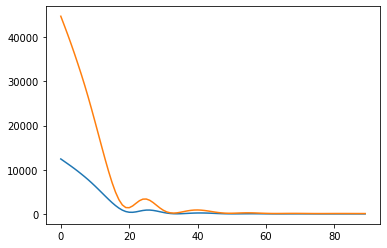

In [1035]:
plt.plot(range(epochs), losses)
plt.plot(range(epochs), test_losses)

In [1036]:
y_pred = model(X_test)
loss = criterion(y_pred, y_test)
print(loss)

tensor(120.5124, grad_fn=<MseLossBackward>)


In [1037]:
X_test[-1].reshape(1,-1)

tensor([[201.3000, 203.8500, 202.0200, 204.0600, 203.9000, 205.0100, 216.5400,
         213.2900, 212.9400, 216.3500, 212.4800, 208.2500, 203.3800, 209.1900,
         208.7000, 208.9000, 210.2800, 211.4900, 209.7000, 214.5800]])

In [1038]:
pred = model(X_test[-1].reshape(1,-1))

In [1039]:
pred = pred.reshape(-1).detach()

In [1040]:
pred

tensor([211.7561, 211.7486, 210.6959, 211.0661, 213.3620, 213.7000, 213.0267,
        214.0594, 212.2471, 215.2707, 212.8997, 213.2862, 213.8068, 214.3684,
        217.1486, 215.3324, 216.5415, 215.8074, 218.1086, 216.9066])

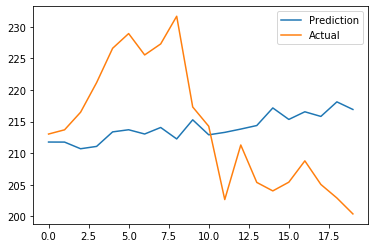

In [1041]:
plt.plot(pred, label="Prediction")
plt.plot(y_test[-1], label="Actual")
plt.legend()

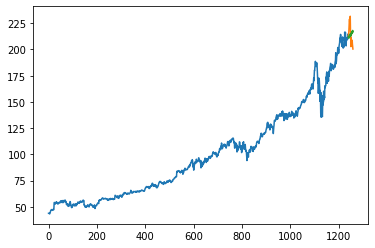

In [1042]:
plt.plot(data1[:-T])
plt.plot(np.arange(T)+len(data[:-T]),Y[-1], label="Actual")
plt.plot(np.arange(T)+len(data[:-T]),pred, label="Prediction")
#plt.legend()

In [1043]:
X[-1]

array([201.300003, 203.850006, 202.020004, 204.059998, 203.899994,
       205.009995, 216.539993, 213.289993, 212.940002, 216.350006,
       212.479996, 208.25    , 203.380005, 209.190002, 208.699997,
       208.899994, 210.279999, 211.490005, 209.699997, 214.580002])